In [ ]:

# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Make plots look nice
plt.style.use('seaborn-v0_8-pastel')


/home/keerthi/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [17]:
#Load data
df = pd.read_csv("/home/keerthi/Downloads/xy_data.csv")

# Extract x and y columns
x_obs = df["x"].values
y_obs = df["y"].values
n = len(df)

# Define t (as per problem statement: 6 < t < 60)
t = np.linspace(6, 60, n)

print(f" Successfully loaded {n} data points from xy_data.csv")

# Display first few rows
df.head()


 Successfully loaded 1500 data points from xy_data.csv


,x,y
0,88.364456,57.784378
1,74.283936,54.406780
2,60.256474,46.311462
3,82.134370,57.717567
4,101.036390,67.849340


In [3]:
#Define Parametric Model

def predict(params, t):
    """
    Given parameters [theta_deg, M, X], predict x(t) and y(t)
    according to the model equations.
    """
    theta_deg, M, X = params
    theta = np.deg2rad(theta_deg)  # convert degrees → radians
    
    term = np.exp(M * np.abs(t)) * np.sin(0.3 * t)
    
    x_pred = (t * np.cos(theta)) - term * np.sin(theta) + X
    y_pred = 42 + t * np.sin(theta) + term * np.cos(theta)
    
    return x_pred, y_pred


In [4]:
#Define L1 Loss Function

def L1_loss(params, t, x_obs, y_obs):
    """
    L1 loss = sum of absolute differences between observed and predicted values
    """
    theta_deg, M, X = params
    
    # Enforce parameter bounds (as per question)
    if not (0 <= theta_deg <= 50 and -0.05 <= M <= 0.05 and 0 <= X <= 100):
        return 1e6  # big penalty for out-of-bounds
    
    x_pred, y_pred = predict(params, t)
    
    # Sum of absolute differences
    l1 = np.sum(np.abs(x_pred - x_obs)) + np.sum(np.abs(y_pred - y_obs))
    
    return l1


In [7]:
#Run Optimization

# Track the loss across iterations for visualization
loss_history = []

def callback(params):
    loss = L1_loss(params, t, x_obs, y_obs)
    loss_history.append(loss)

# Initial guess
x0 = [20.0, 0.0, 10.0]

# Run optimization
result = minimize(
    L1_loss,
    x0,
    args=(t, x_obs, y_obs),
    method='Nelder-Mead',
    callback=callback,
    options={'maxiter': 10000, 'xatol': 1e-10, 'fatol': 1e-10, 'disp': True}
)

# Extract estimated parameters
theta_deg_est, M_est, X_est = result.x
x_pred, y_pred = predict(result.x, t)

# Print results clearly
print("Optimization Results:")
print("Success:", result.success)
print("Message:", result.message)
print(f"Estimated θ (degrees): {theta_deg_est:.6f}")
print(f"Estimated M          : {M_est:.8f}")
print(f"Estimated X          : {X_est:.6f}")
print(f"Final L1 Loss        : {result.fun:.4f}")


Optimization terminated successfully.
         Current function value: 37865.093838
         Iterations: 257
         Function evaluations: 498
Optimization Results:
Success: True
Message: Optimization terminated successfully.
Estimated θ (degrees): 28.118423
Estimated M          : 0.02138896
Estimated X          : 54.898615
Final L1 Loss        : 37865.0938


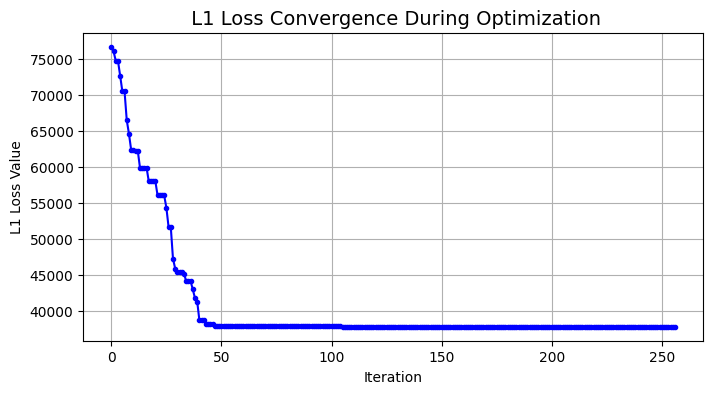

In [16]:
#visualize L1 loss convergence

plt.figure(figsize=(8,4))
plt.plot(loss_history, '-o', markersize=3, color='blue')
plt.title(" L1 Loss Convergence During Optimization", fontsize=14)
plt.xlabel("Iteration")
plt.ylabel("L1 Loss Value")
plt.grid(True)
plt.show()


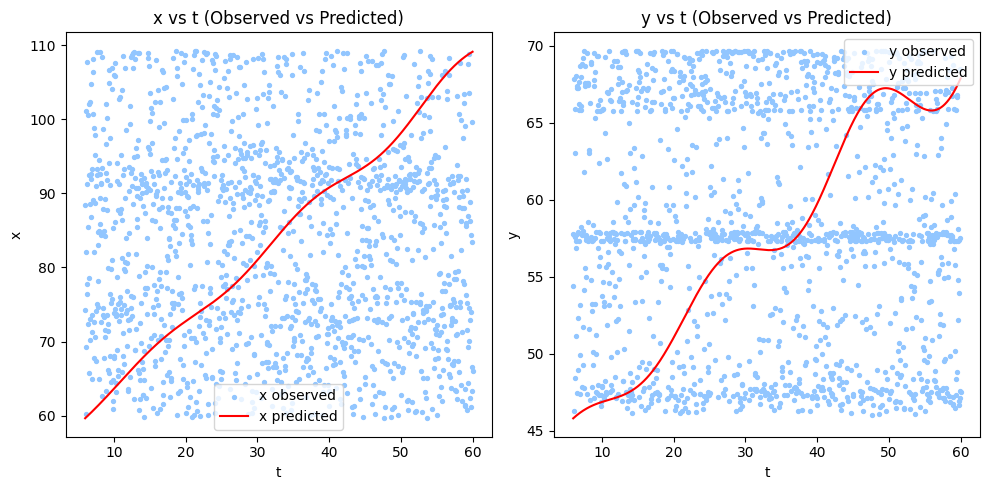

In [9]:
#compare observed vs predicted data

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(t, x_obs, s=8, label="x observed")
plt.plot(t, x_pred, 'r', label="x predicted")
plt.xlabel("t")
plt.ylabel("x")
plt.title("x vs t (Observed vs Predicted)")
plt.legend()

plt.subplot(1,2,2)
plt.scatter(t, y_obs, s=8, label="y observed")
plt.plot(t, y_pred, 'r', label="y predicted")
plt.xlabel("t")
plt.ylabel("y")
plt.title("y vs t (Observed vs Predicted)")
plt.legend()

plt.tight_layout()
plt.show()


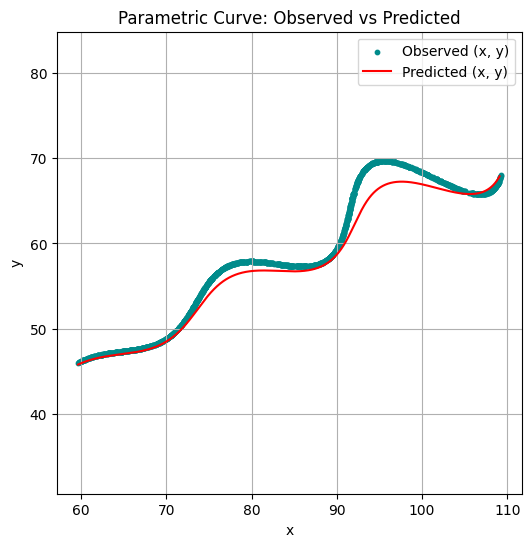

In [10]:
#visualize the parametric curve(x,y)

plt.figure(figsize=(6,6))
plt.scatter(x_obs, y_obs, s=10, color='darkcyan', label="Observed (x, y)")
plt.plot(x_pred, y_pred, 'r', label="Predicted (x, y)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Parametric Curve: Observed vs Predicted")
plt.legend()
plt.axis("equal")
plt.grid(True)
plt.show()


In [15]:
#save results to CSV

out = pd.DataFrame({
    "t": t,
    "x_obs": x_obs,
    "y_obs": y_obs,
    "x_pred": x_pred,
    "y_pred": y_pred
})
out.to_csv("xy_fit_L1_results.csv", index=False)

print("Saved predicted data to 'xy_fit_L1_results.csv'")


Saved predicted data to 'xy_fit_L1_results.csv'


In [14]:
#Print final equation

theta_rad = np.deg2rad(theta_deg_est)

print("===================================================")
print("Final Estimated Parameters ")
print("===================================================")
print(f"θ (degrees) = {theta_deg_est:.6f}")
print(f"θ (radians) = {theta_rad:.6f}")
print(f"M           = {M_est:.8f}")
print(f"X           = {X_est:.6f}")

print("\nLaTeX / Desmos-Ready Expression:")
print(f"(t*cos({theta_rad:.6f}) - e^({M_est:.8f}*abs(t))*sin(0.3*t)*sin({theta_rad:.6f}) + {X_est:.6f},")
print(f" 42 + t*sin({theta_rad:.6f}) + e^({M_est:.8f}*abs(t))*sin(0.3*t)*cos({theta_rad:.6f}))")
print("===================================================")


Final Estimated Parameters 
θ (degrees) = 28.118423
θ (radians) = 0.490759
M           = 0.02138896
X           = 54.898615

LaTeX / Desmos-Ready Expression:
(t*cos(0.490759) - e^(0.02138896*abs(t))*sin(0.3*t)*sin(0.490759) + 54.898615,
 42 + t*sin(0.490759) + e^(0.02138896*abs(t))*sin(0.3*t)*cos(0.490759))
